In [1]:
import sys
import pandas as pd
import numpy as np


In [25]:
sys.path.append("../")


In [26]:
import biobss


In [27]:
import neurokit2 as nk
sample_data = pd.read_pickle("..\sample_data\\EDA_Chest.pkl")
sample_data = sample_data.flatten()


In [28]:
decompose = biobss.pipeline.Bio_Process(
    process_method=biobss.edatools.eda_decompose, modality="EDA", sigtype="EDA", method="highpass")

filtering=biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.filter_signal, modality="EDA", sigtype="EDA",N=2, filter_type="highpass",f1=0.5,fs=700)

normalize = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.normalize_signal, modality="EDA", sigtype="EDA")
resample = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.resample_signal_object, modality="EDA", sigtype="EDA", target_sample_rate=350)
signal_features = biobss.pipeline.Feature(name="signal_features", function=biobss.edatools.signal_features.get_signal_features, parameters={
                                           "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
stat_features = biobss.pipeline.Feature(name="stat_features", function=biobss.common.stat_features.get_stat_features, parameters={
                                         "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
corr_features = biobss.pipeline.Feature(name="corr_features", function=biobss.common.correlation_features, parameters={
                                        "modality": "EDA", "sigtype": "EDA","signal_names":['EDA_Raw','EDA_Tonic','EDA_Phasic']}, input_signals={'EDA':['EDA_Raw','EDA_Tonic','EDA_Phasic']})


In [29]:
pipe = biobss.pipeline.Bio_Pipeline(modality="EDA", sigtype="EDA", windowed_process=True,
                                    window_size=60, step_size=30, features_list=[])


In [30]:
pipe.preprocess_queue.add_process(normalize)
pipe.process_queue.add_process(resample)
pipe.process_queue.add_process(decompose)
pipe.add_feature_step(signal_features)
pipe.add_feature_step(stat_features)
pipe.add_feature_step(corr_features)


In [31]:
pipe.feature_list

In [32]:
pipe.set_input(sample_data, 700, name="EDA_Raw", modality="EDA")


In [33]:
pipe.input


Signal object with 1 channel(s)
EDA_Raw (EDA) (700Hz) ((5920.0,)s) (1 windows) ((4144000,))

In [34]:
pipe


Bio_Pipeline:
	Modality: EDA
	Signal Type: EDA
	Preprocessors: Process list:
	1: normalize_signal

	Processors: Process list:
	1: resample_signal_object
	2: eda_decompose

	Postprocessors: Process list:

	Window Size(Seconds): 60
	Step Size: 30

In [35]:
pipe.run_pipeline()


c:\Users\Cagatay\Desktop\Workspace\Biobss Pipeline\biobss\examples\..\biobss\pipeline\bio_process.py:54: UserWarning: Vectorized method failed. Trying scalar method. It may be significantly slower.
  warnings.warn(


In [36]:
pipe.input


Signal object with 3 channel(s)
EDA_Raw (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Tonic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Phasic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))

In [37]:
pipe.extract_features()


In [38]:
pipe.features


,EDA_Raw_rms,EDA_Raw_acr_length,EDA_Raw_integral,EDA_Raw_average_power,EDA_Tonic_rms,EDA_Tonic_acr_length,EDA_Tonic_integral,EDA_Tonic_average_power,EDA_Phasic_rms,EDA_Phasic_acr_length,...,EDA_Phasic_std,EDA_Phasic_max,EDA_Phasic_min,EDA_Phasic_range,EDA_Phasic_kurtosis,EDA_Phasic_skew,EDA_Phasic_momentum,EDA_RawEDA_Tonic_correl,EDA_RawEDA_Phasic_correl,EDA_TonicEDA_Phasic_correl
0.0,1.307888,20999.749871,27433.892859,1.710571,1.309213,20999.000004,27482.780081,1.714039,0.027720,20999.749859,...,0.027651,0.145000,-0.091791,0.236791,3.016872,0.509587,0.000765,0.892838,0.460238,0.082783
30.0,1.198245,20999.691437,25031.102031,1.435790,1.195650,20999.000008,24990.627494,1.429578,0.030452,20999.691421,...,0.030409,0.152091,-0.103868,0.255959,2.706003,0.798563,0.000925,0.968017,0.354422,0.113115
60.0,1.129678,20999.747814,23684.427371,1.276173,1.127347,20999.000004,23651.296913,1.270911,0.023422,20999.747805,...,0.023410,0.131675,-0.088539,0.220214,2.598129,1.147680,0.000548,0.932820,0.507695,0.186358
90.0,1.269795,20999.845415,26563.982437,1.612380,1.271075,20999.000006,26598.241688,1.615631,0.018601,20999.845408,...,0.018491,0.128411,-0.139853,0.268264,5.028224,1.476359,0.000342,0.986644,0.261989,0.108369
120.0,1.403914,20999.756391,29464.026703,1.970973,1.405365,20999.000001,29497.002789,1.975052,0.010810,20999.756389,...,0.010724,0.060718,-0.133899,0.194617,4.515790,1.083956,0.000115,0.980714,0.432707,0.255073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730.0,0.890785,20999.227503,18704.470559,0.793498,0.891307,20999.000000,18716.400245,0.794428,0.007761,20999.227502,...,0.007757,0.056128,-0.070630,0.126758,0.976698,0.246343,0.000060,0.797756,0.714758,0.168777
5760.0,0.896704,20999.279074,18829.164693,0.804078,0.896698,20999.000000,18829.899100,0.804068,0.007658,20999.279074,...,0.007657,0.064662,-0.092447,0.157109,2.723685,0.113229,0.000059,0.775292,0.695236,0.107024
5790.0,0.890915,20999.286985,18707.290795,0.793729,0.890900,20999.000000,18707.898835,0.793703,0.007333,20999.286985,...,0.007321,0.065426,-0.090578,0.156004,3.753207,0.233655,0.000054,0.789331,0.710548,0.155130
5820.0,0.916721,20999.240598,19201.646324,0.840378,0.915726,20999.000004,19196.022858,0.838554,0.016851,20999.240590,...,0.016665,0.060293,-0.093919,0.154212,2.670031,-0.950739,0.000278,0.958710,0.188909,-0.026640


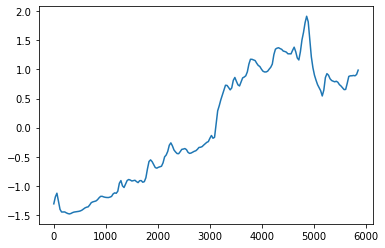

In [40]:
import matplotlib.pyplot as plt

plt.plot(pipe.features['EDA_Tonic_mean'])


In [41]:
pipe.features['EDA_Raw_acr_length']

0.0       20999.749871
30.0      20999.691437
60.0      20999.747814
90.0      20999.845415
120.0     20999.756391
              ...     
5730.0    20999.227503
5760.0    20999.279074
5790.0    20999.286985
5820.0    20999.240598
5850.0    20999.166637
Name: EDA_Raw_acr_length, Length: 196, dtype: float64